In [1]:
import pandas as pd
import re

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

# DATA Load

In [2]:
reviews = pd.read_csv('./lec_review.csv')

In [3]:
reviews.head()

,review,star,pos_neg
0,전공 두개 합친만큼 신경써야 점수가 나오는 신기한 강의,2,neg
1,재수강하러갑니다.시험 대부분 문제가 주관식으로 나오는데 구절 빈칸넣기라던가 스토리보...,1,neg
2,성적 너그러이주심. 강의력은 조금부족하긴한데 설명잘해주심,3,mid
3,1. 수강 자체는 굉장히 편함2. 기말고사는 어려운데 패스 자체에 영향을 미치진 않는듯,4,pos
4,1. 교수님이 인도사 전공으로 사실상 쟁점인도사2. 과제가 소소하게 많지만 어렵거나...,5,pos


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2600 non-null   object
 1   star     2600 non-null   int64 
 2   pos_neg  2600 non-null   object
dtypes: int64(1), object(2)
memory usage: 61.1+ KB


# DATA Preprocess

In [5]:
def text_preprocessing(review, okt, remove_stopwords=False, stop_words = []) -> str:
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', review)
    text_morpheme = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        word_review = [token for token in text_morpheme if not token in stop_words]
        
    return " ".join(word_review)

In [6]:
okt = Okt()
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '되',
                 '수', '보', '주', '등', '한', '님', '도'])
clean_reviews = []

for review in reviews['review']:
    clean_reviews.append(text_preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))

In [7]:
reviews['clean_review'] = clean_reviews
reviews.head()

,review,star,pos_neg,clean_review
0,전공 두개 합친만큼 신경써야 점수가 나오는 신기한 강의,2,neg,전공 두 개 합치다 신경 써다 점수 나오다 신기하다 강의
1,재수강하러갑니다.시험 대부분 문제가 주관식으로 나오는데 구절 빈칸넣기라던가 스토리보...,1,neg,재수강 하다 가다 시험 대부분 문제 주관 식 으로 나오다 구절 빈칸 넣기 라던가 스...
2,성적 너그러이주심. 강의력은 조금부족하긴한데 설명잘해주심,3,mid,성적 너그럽다 주심 강의 력 조금 부족하다 설명 잘해주다 심
3,1. 수강 자체는 굉장히 편함2. 기말고사는 어려운데 패스 자체에 영향을 미치진 않는듯,4,pos,수강 자체 굉장하다 편하다 기말고사 어렵다 패스 자체 에 영향 을 미치다 않다
4,1. 교수님이 인도사 전공으로 사실상 쟁점인도사2. 과제가 소소하게 많지만 어렵거나...,5,pos,교수 인도 사 전공 으로 사실 상 쟁점 인 도사 과제 소소하다 많다 어렵다 시간 많...


# DATA Visualization

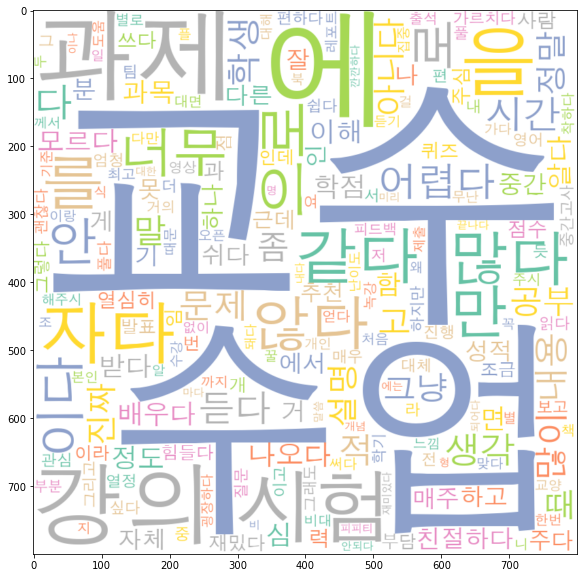

In [8]:
words = []
verbs = ['하다', '좋다', '있다', '없다', '되다', '들다', '보다', '해주다']
for word in list(reviews['clean_review']):
    for each in word.split():
        if each not in verbs: words.append(each)

font_path = "/Library/Fonts/AppleGothic.ttf"

wc = WordCloud(font_path=font_path, width=800, height=800, 
               background_color="white", colormap="Set2")

wc = wc.generate_from_frequencies(Counter(words))
wc = wc.to_array()

fig=plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Topic modeling

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

cv = CountVectorizer()
X_train = cv.fit_transform(reviews['clean_review'])

svd = TruncatedSVD(n_components=3, algorithm='randomized', 
                   n_iter=100, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=3, n_iter=100, random_state=42)

In [10]:
term = cv.get_feature_names()

def topics(components, feature_names, n=5):
    for index, topic in enumerate(components, start=1):
        print(f'Topic {index}:', end=' ')
        print([(feature_names[i], topic[i].round(5)) 
               for i in topic.argsort()[:-n-1:-1]])

In [11]:
topics(svd.components_, term)

Topic 1: [('하다', 0.75471), ('수업', 0.24649), ('교수', 0.23329), ('있다', 0.21534), ('강의', 0.15681)]
Topic 2: [('하다', 0.59175), ('진행', 0.03127), ('준비', 0.0248), ('이러하다', 0.02415), ('마이크', 0.02341)]
Topic 3: [('강의', 0.36926), ('과제', 0.32087), ('시험', 0.2871), ('있다', 0.24279), ('같다', 0.08871)]


In [12]:
# test data에 대해서도 진행
test = pd.read_csv('./sw_lec_review.csv')
test.columns = ['lecture', 'professor', 'review']
test_clean_reviews = []

for review in test['review']:
    test_clean_reviews.append(text_preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))

In [13]:
test['clean_review'] = test_clean_reviews
test.head()

,lecture,professor,review,clean_review
0,Capstone디자인(산학협력프로젝트),"권기학, 문현준",보고서가 많은편이긴한데학점은퍼주네요 굳,보고서 많다 편이 기다 학점 퍼 주네 요 굳다
1,C프로그래밍및실습,김도년,수업끝나고 수업시간에 진행한 코드작성 못하면 남아서 될냐까지 해야함 그런거 빼고 낫...,수업 끝나다 수업 시간 에 진행 코드 작성 못 하다 남아 서 되다 까지 하다 함 그...
2,C프로그래밍및실습,김도년,실습끝까지 남기시는 거 뺴곤 아주좋으심 너그러우신편,실습 끝 까지 남다 거 뺴곤 아주 좋다 심 너그럽다 편
3,C프로그래밍및실습,김도년,교수님 엄청 친절하시고 귀여우셔요..과제만열심히 제때제때하면 되니까 그거만으로도 충...,교수 엄청 친절하다 귀엽다 과제 만 열심히 제때 제때 면 되다 그거 만으로도 충분하...
4,C프로그래밍및실습,김도년,교수님 과제많아서 시험준비는 과제한거 복습하면됨. 귀여우심,교수 과제 많다 시험 준비 과제 거 복습 하다 되다 귀 여우 심


In [18]:
reviews.to_csv('processed_lec_review.csv', index=False)
test.to_csv('test_lec_review.csv', index=False)